In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
# %matplotlib inline 

In [3]:
df= pd.read_csv(r'C:\Users\user\Desktop\DETECTOR\phishing_site_urls.csv')

In [4]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
df.shape

(549346, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [7]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

to check how manys are good or bad

In [8]:
df.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

text data conversion into vector --Tokenize

In [9]:
from nltk.tokenize import RegexpTokenizer

In [10]:
tokenizer= RegexpTokenizer(r'[A-Za-z]+')

In [11]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [14]:
df['text_token']=df.URL.map(lambda t:tokenizer.tokenize(t))

In [13]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [23]:
from nltk.stem.snowball import SnowballStemmer

In [24]:
stemmer=SnowballStemmer('english')

In [25]:
df['text_stem']= df['text_token'].map(lambda l:[stemmer.stem(word) for word in l])

In [26]:
df.head()

,URL,Label,text_token,text_stem
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


**Converting into sentence means where there is space remove it**

In [27]:
df['text']=df['text_stem'].map(lambda l: ' '.join(l))

In [28]:
df.head()

,URL,Label,text_token,text_stem,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


**Slicing** -- separate good or bad labels

In [29]:
good_site = df[df.Label == 'good']
bad_site = df[df.Label == 'bad']

In [30]:
good_site.head()

,URL,Label,text_token,text_stem,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [31]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [32]:
def plot_wordcloud(text,mask=None,max_words=400,max_font_size=120,figure_size=(24.0,16.0),
                  title=None,title_size=40,image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords={'com','http'}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = wordCloud(background_color='white',
                         stopwords=stopwords,
                         max_words=max_words,
                         max_font_size=max_font_size,
                         random_state=42,
                         mask=mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = imageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation="bilinear")
        plt.title(title ,fontdict={'size': title_size,'verticalalignment': 'bottom'})

    else:
        plt.imshow(wordcloud)
        plt.title(title ,fontdict={'size': title_size,'verticalalignment': 'bottom'})

    plt.axis('off')
    plt.tight_layout()

In [33]:
all_text =' '.join(good_site['text'].tolist())

you can call **all_text** it will gives you all text 


In [34]:
from wordcloud import WordCloud

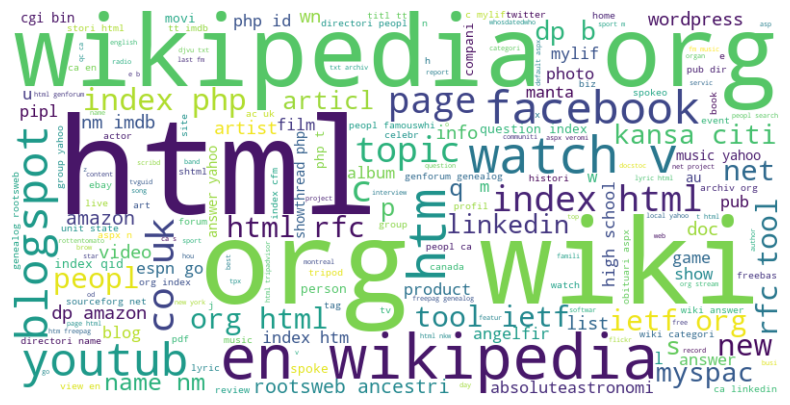

In [35]:
wordcloud= WordCloud(width=800 ,height=400 ,background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
bad_site.head()

,URL,Label,text_token,text_stem,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [37]:
all_text =' '.join(bad_site['text'].tolist())

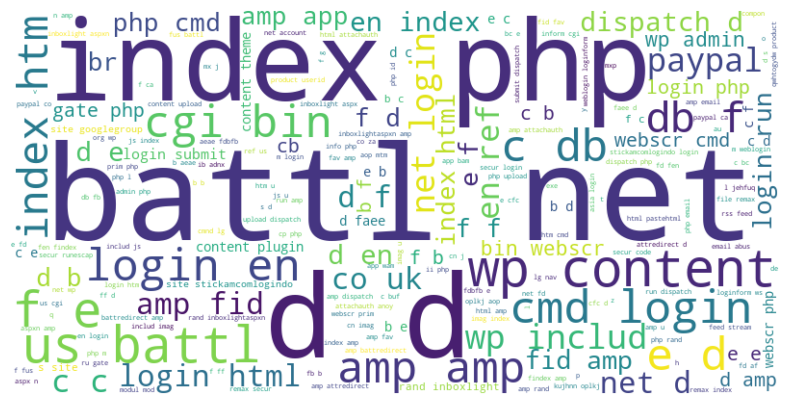

In [38]:
wordcloud= WordCloud(width=800 ,height=400 ,background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
cv=CountVectorizer()

In [41]:
features=cv.fit_transform(df.text)

**Slicng of first 5 into array**

In [42]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 350837))

In [43]:
from sklearn.model_selection import train_test_split

DATA SPLIT FOR TRAIN AND TEST

In [44]:
x_train,x_test,y_train,y_test = train_test_split(features,df.Label,test_size=0.2)

80% for training and 20% for testing 

> **MODEL TRAINNG**

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
l_model = LogisticRegression()

In [47]:
l_model.fit(x_train,y_train)

c:\Users\user\Desktop\DETECTOR\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
l_model.score(x_test,y_test)

0.9647128424501684

ACCURACY =96% TESTING ACCURACY 

In [49]:
l_model.score(x_train,y_train)

0.9780443073114345

ACCURACY = 97% TRAINING ACCURACY
IF TESTING ACCURACY IS LESS AND TRAINNG HIGH THEN WE SAY OUR MODEL IS OVERFIT

In [50]:
from sklearn.metrics import classification_report

In [51]:
print('\nCLASSIFICATION  REPORT\n')
print(classification_report(l_model.predict(x_test),y_test,target_names =['Bad','Good']))


CLASSIFICATION  REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     29243
        Good       0.99      0.96      0.98     80627

    accuracy                           0.96    109870
   macro avg       0.95      0.97      0.96    109870
weighted avg       0.97      0.96      0.97    109870



In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
con_mat=pd.DataFrame(confusion_matrix(l_model.predict(x_test),y_test),
                    columns=['Predicted:Bad','Predicted:Good'],
                    index=['Actual:Bad','Actual:Good'])

In [54]:
import seaborn as sns


Confusion Matrix



<Axes: >

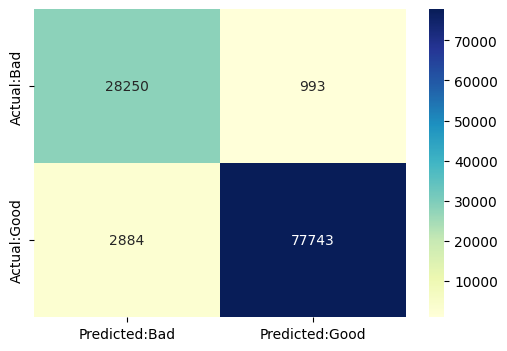

In [55]:
print('\nConfusion Matrix\n')
plt.figure(figsize=(6,4))
sns.heatmap(con_mat,annot=True,fmt='d',cmap="YlGnBu")

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
mnb = MultinomialNB()

In [58]:
mnb.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [59]:
mnb.score(x_test,y_test)

0.957704559934468

> **#SAVE MODEL** 

In [60]:
import pickle

In [61]:
pickle.dump(l_model,open('phishing.pkl','wb'))
pickle.dump(mnb,open('phishing_mnb.pkl','wb'))
pickle.dump(cv,open('vectorizer.pkl','wb'))

In [62]:
predict_good=['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU']
predict_bad=['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php',
             'fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','youtube.com/']


In [63]:
predict_good=cv.transform(predict_good)
predict_bad=cv.transform(predict_bad)

In [64]:
l_model.predict(predict_good)

array(['good', 'good'], dtype=object)

In [65]:
l_model.predict(predict_bad)

array(['bad', 'bad', 'bad', 'good'], dtype=object)

In [66]:
mnb.predict(predict_good)

array(['good', 'good'], dtype='<U4')

In [67]:
mnb.predict(predict_bad)

array(['bad', 'bad', 'bad', 'good'], dtype='<U4')